In [1]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from matplotlib import pyplot as plt

Load Data
Load the labor data into a dataframe. You probably don't want to change this section.

In [2]:
#Load/preview data
df = pd.read_csv("LabourTrainingEvaluationData.csv")
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


Part 1 - Age
Make and plot a Hist and Pmf for age.
What fraction of the people in the data are 51? What fraction are older than 51?
What is the median age?
Does the distribution of the sample data seem to mirror the working age population?

In [3]:
agehist = thinkstats2.Hist(df['Age'], label='Age')

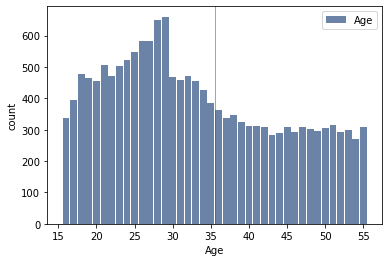

In [4]:
# thinkplot.hist 適合用於資料少的直條圖

thinkplot.Hist(agehist)
thinkplot.Config(xlabel='Age', ylabel='count')
thinkplot.axvline(np.mean(agehist), color="red")

The working population for any country is between ages 15 and 64. The mean age is about 32 - 38.The data seems to mirror the working population.
任何國家的工作人口都在 15 至 64 歲之間。平均年齡約為 32 至 38 歲。數據似乎反映了工作人口。

In [5]:
print("Mean Age : %.2f" % np.mean(df["Age"]))

Mean Age : 33.23


In [6]:
dfpmf_age = thinkstats2.Pmf(df["Age"])

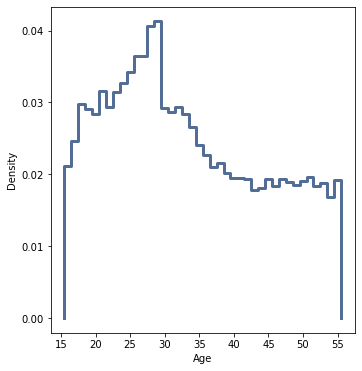

<Figure size 576x432 with 0 Axes>

In [7]:
#Graph
# # thinkplot.Pmf 列出連著的直條圖，適合大量資料

thinkplot.PrePlot(cols=2)
thinkplot.Pmfs([dfpmf_age])
#thinkplot.Show(xlabel="Age", ylabel = "Percentage")
thinkplot.Show(xlabel="Age", ylabel = "Density")

In [8]:
print("Median Age is: %.2f" % np.median(df["Age"]))

Median Age is: 31.00


What fraction of the people in the data are 51? What fraction are older than 51?

There are multiple ways of achieving this, I will provide three alternatives

Method 1:

{'xscale': 'linear', 'yscale': 'linear'}

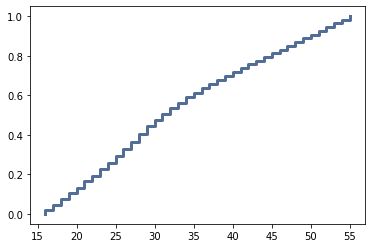

In [9]:
#Create and show CDF of Age
df_cdf = thinkstats2.Cdf(df['Age'])
thinkplot.Cdf(df_cdf)

In [10]:
df_cdf.Prob(51)

0.926775887943972

In [11]:
#And if we want to see in in pretty printing
print("Fraction of people that are 51 is:",str(round(df_cdf.Prob(51), 3)*100)+"%")

Fraction of people that are 51 is: 92.7%


Method 2:

The method 2 shows the cumulative frequency and the percentage distribution. 

Fraction of people below 51 is 92.7% and the count is 14821

方法2顯示了累積頻率和百分比分佈。

51 歲以下人口的比例為 92.7%，總數為 14821

In [12]:
# creating a frequency table and ensuring it's sorted

s = df['Age']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
df_freq1= pd.DataFrame({'counts': counts, 'percent': percent, '%': percent100})
df_freq2 = df_freq1.sort_index () # making sure the date is sorted
df_freq2.index.name = 'Age' # renaming the index cloumn name to age
df_freq2["cumulative freq"]= df_freq2['counts'].cumsum()
df_freq2["cumulative %"]= df_freq2['percent'].cumsum().mul(100).round(1).astype(str) + '%'
df_freq2.tail()

,counts,percent,%,cumulative freq,cumulative %
Age,,,,,
51,314,0.019635,2.0%,14821,92.7%
52,294,0.018384,1.8%,15115,94.5%
53,300,0.018759,1.9%,15415,96.4%
54,270,0.016883,1.7%,15685,98.1%
55,307,0.019197,1.9%,15992,100.0%


Method 3:

In [13]:
# using .loc and lamba for slicing is efficient
df_1 = df['Age'].loc[lambda x : x<=51] #putting Age in pandas series
type(df_1)

pandas.core.series.Series

In [14]:
df_1.head()

0    45
1    21
2    38
3    48
4    18
Name: Age, dtype: int64

In [15]:
print(df.shape, df_1.shape,sep="\n")

(15992, 9)
(14821,)


In [16]:
print("Share of people 51 and below is: %.4f" %((df_1.shape[0]/df.shape[0])))

Share of people 51 and below is: 0.9268


In [17]:
print('Total number of people 51 and below:',df_1.count())

Total number of people 51 and below: 14821


In [18]:
# using .loc and lamba for slicing is efficient
df_2 = df['Age'].loc[lambda x : x>51]
type(df_2)

pandas.core.series.Series

In [19]:
df_2.head()

12    53
43    54
52    52
53    54
62    55
Name: Age, dtype: int64

In [20]:
# checking the shape is similar to counting rows and columns:

print(df.shape, df_1.shape, df_2.shape,sep="\n")

(15992, 9)
(14821,)
(1171,)


In [21]:
print('Total number of people above 51:',df_2.count())

Total number of people above 51: 1171


In [22]:
# %>51 in the dataset

print("Share of people older than 51 is: %.4f" %((df_2.shape[0]/df.shape[0])))

Share of people older than 51 is: 0.0732


Part 2 - Demographics

Consider some of the demographic features:
Education
Race
Hisp
MaritalStatus
Nodeg.

This data came from the United States, does it appear to be a representative sample of the US population?
Demonstrate this in some way in your code.
Exploring the data...

In [23]:
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [24]:
# check for consistencies in Race data
# # 檢查 Race 數據的一致性

print(df["Race"].value_counts(), df["Hisp"].value_counts(),sep="\n")

NotBlack    14816
black        1176
Name: Race, dtype: int64
NotHispanic    14840
hispanic        1152
Name: Hisp, dtype: int64


I will try to regroup the race into three : NotHispanicNotBlack, Hispanic and black.

The column Race and Hisp gives two categories, whether black or not and hispanic or NotHispanic. 

Though, there are other different races in America. if you are notblack, you msut be white, hispanic or other races vice versa. 

so, the rows with 'NotBlack' and 'NotHispanic' will be NotBlackNotHispanic in the new column(Races). 

Also, if Race is black and Hisp is NotHispanic, then Races will be black and if Hisp is hipanic and Race is Notblack, then Races will be NotBlackNotHispanic

我將嘗試將比賽重新組合為三個：NotHipanicNotBlack、西班牙裔和黑人。

Race and Hisp 列給出了兩個類別，無論是黑人與否，西班牙裔或非西班牙裔。

不過，美國還有其他不同的種族。 如果你不是黑人，你必須是白人、西班牙裔或其他種族，反之亦然。

因此，帶有“NotBlack”和“NotHispanic”的行將在新列（Races）中為 NotBlackNotHispanic。

此外，如果 Race 是黑人而 Hisp 是 NotHispanic，那麼 Races 將是黑人，如果 Hisp 是 hipanic 而 Race 是 Notblack，那麼 Races 將是 NotBlackNotHispanic

In [25]:
df['Races'] = '' # create an empty string column
df.loc[((df['Hisp'] =="NotHispanic") & (df['Race']=='NotBlack')), 'Races'] = "NotBlackNotHispanic"
df.loc[((df['Hisp'] =="hispanic") & (df['Race']=='NotBlack')), 'Races'] = "hispanic"
df.loc[(df['Race']=='black'), 'Races'] = "black"

In [26]:
df["Races"].value_counts()

NotBlackNotHispanic    13664
black                   1176
hispanic                1152
Name: Races, dtype: int64

The black population is about 13% and Hispanic population is about 16% with the majority white about 62%. The data does not reflect the US population distribution but has some pattern that is consistent with US population.

黑人人口約佔 13%，西班牙裔人口約佔 16%，白人約佔 62%。 該數據不反映美國人口分佈，但有一些與美國人口一致的模式。

In [27]:
Race = df["Races"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
Race

NotBlackNotHispanic    85.4%
black                   7.4%
hispanic                7.2%
Name: Races, dtype: object

In [28]:
# There column 'Races' now have 3 races: NotBlackNotHispanic(i.e whites and other races), 
# black and hispanic. The data can be grouped by their different demographic characteristics

df_Races = df.groupby("Races")
df_MaritalStatus = df.groupby("MaritalStatus")
df_Education = df.groupby("Eduacation")
df_Nodeg = df.groupby("Nodeg")

In [29]:
# check the newly created group dataframe
# 西班牙裔比黑人掙得更多
# df_Races = df.groupby("Races")
df_Races.Earnings_1974.agg(['max', 'min', 'count', 'median', 'mean'])

,max,min,count,median,mean
Races,,,,,
NotBlackNotHispanic,25862.32,0.0,13664,15881.820,14375.900117
black,25862.32,0.0,1176,11079.650,11426.576987
hispanic,25862.32,0.0,1152,12668.615,12401.663826


Although the data has same maximum and minimum values for all races, it however shows that NotBlackNotHispanic (mean Earning in 1974 = 12401.663826) and black( mean Earning in 1974 = $11426.578). The hispanic however earn more than the blacks

In [30]:
# df_Education = df.groupby("Eduacation")
df_Education.Earnings_1975.agg(['max', 'min', 'count', 'median', 'mean'])

,max,min,count,median,mean
Eduacation,,,,,
HighSchool,25243.55,0.0,6252,15991.16,14715.210287
Intermediate,25243.55,0.0,2708,14660.95,13831.999546
LessThanHighSchool,25243.55,0.0,4731,10727.61,11128.144656
PostGraduate,25243.55,0.0,934,18998.90,14965.138316
graduate,25243.55,0.0,1367,19113.48,16256.332516


It is obvious that the data has some outliers, with the maximum value for earnings and even minimum. It has same values for max for all categories of eductaion

Considering Earnings with some demographic characteristics shows that the data has been influenced by outliers. Especially, the maximum and minimum earnings.

很明顯，數據存在一些異常值，收益值最大，甚至最小。 對於所有教育類別，它具有相同的最大值

考慮具有某些人口統計特徵的收入表明數據受到異常值的影響。 特別是最高和最低收益。

In [31]:
# df_MaritalStatus = df.groupby("MaritalStatus")
df_MaritalStatus.Earnings_1978.agg(['max', 'min', 'count', 'median', 'mean'])

,max,min,count,median,mean
MaritalStatus,,,,,
Married,25564.67,0.0,11382,19664.850,16390.997167
NotMarried,25564.67,0.0,4610,9982.043,11033.720550


In [32]:
# df_Nodeg = df.groupby("Nodeg")
df_Nodeg.Earnings_1974.agg(['max', 'min', 'count', 'median', 'mean'])

,max,min,count,median,mean
Nodeg,,,,,
0,25862.32,0.0,11261,16741.93,15032.593755
1,25862.32,0.0,4731,11397.05,11598.949946


Demographic Conclusion
Before further exploration, I will like to remove the outliers

In [33]:
# Average Income of different race in 1978
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978,Races
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670,NotBlackNotHispanic
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080,NotBlackNotHispanic
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670,NotBlackNotHispanic
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670,NotBlackNotHispanic
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869,NotBlackNotHispanic


In [34]:
df_Inc= df.groupby(['Races'],as_index=False).Earnings_1978.mean()
print(df_Inc)

                 Races  Earnings_1978
0  NotBlackNotHispanic   15213.330607
1                black   12006.682951
2             hispanic   13396.677888


In [35]:
# Earning differences by Education categories of differen race in 1978
df_2 = df.groupby(['Races','Eduacation'],as_index=False).Earnings_1978.mean()
print(df_2)

                  Races          Eduacation  Earnings_1978
0   NotBlackNotHispanic          HighSchool   15819.656292
1   NotBlackNotHispanic        Intermediate   15546.470819
2   NotBlackNotHispanic  LessThanHighSchool   12877.008660
3   NotBlackNotHispanic        PostGraduate   16509.385779
4   NotBlackNotHispanic            graduate   17698.571191
5                 black          HighSchool   12938.735144
6                 black        Intermediate   12660.876775
7                 black  LessThanHighSchool   10664.903237
8                 black        PostGraduate   15748.586935
9                 black            graduate   13616.426392
10             hispanic          HighSchool   14385.919056
11             hispanic        Intermediate   14687.559769
12             hispanic  LessThanHighSchool   12468.019784
13             hispanic        PostGraduate   12859.961546
14             hispanic            graduate   15459.059333


In [36]:
# Earning differences by MaritalStatus of different race in 1978
df_3 = df.groupby(['Races','MaritalStatus'],as_index=False).Earnings_1978.mean()
print(df_3)

                 Races MaritalStatus  Earnings_1978
0  NotBlackNotHispanic       Married   16741.502728
1  NotBlackNotHispanic    NotMarried   11319.289312
2                black       Married   13728.471118
3                black    NotMarried    9198.666009
4             hispanic       Married   14607.033379
5             hispanic    NotMarried   10138.028490


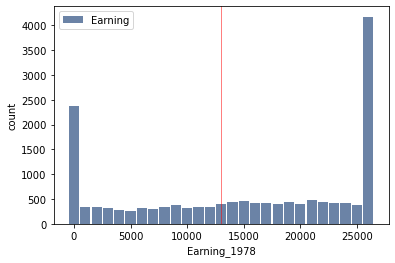

In [37]:
df_Earn78 = thinkstats2.Hist(round(df['Earnings_1978'],-3), label='Earning')

#Graph
# The outliiers are visible and between the two ends( 0 and above 25,0000). 
# I will try and look for the outliers and remove them.

thinkplot.Hist(df_Earn78)
thinkplot.Config(xlabel='Earning_1978', ylabel='count')
thinkplot.axvline(np.mean(df_Earn78), color="red")

In [38]:
# sorting the values for the two ends 
df = df.sort_values(["Earnings_1978","Earnings_1974","Earnings_1975"] ) 

# viewing the top 20 and last 20 base of the sorting
display(pd.concat([df.head(20),df.tail(20)])) 

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978,Races
40,21,HighSchool,NotBlack,hispanic,NotMarried,0,0.00,0.00,0.00,hispanic
130,53,LessThanHighSchool,NotBlack,NotHispanic,Married,1,0.00,0.00,0.00,NotBlackNotHispanic
137,30,HighSchool,NotBlack,NotHispanic,Married,0,0.00,0.00,0.00,NotBlackNotHispanic
143,54,HighSchool,NotBlack,NotHispanic,Married,0,0.00,0.00,0.00,NotBlackNotHispanic
150,54,HighSchool,NotBlack,NotHispanic,NotMarried,0,0.00,0.00,0.00,NotBlackNotHispanic
167,36,PostGraduate,NotBlack,NotHispanic,NotMarried,0,0.00,0.00,0.00,NotBlackNotHispanic
168,55,LessThanHighSchool,NotBlack,NotHispanic,Married,1,0.00,0.00,0.00,NotBlackNotHispanic
203,22,HighSchool,NotBlack,NotHispanic,NotMarried,0,0.00,0.00,0.00,NotBlackNotHispanic
222,43,HighSchool,NotBlack,NotHispanic,Married,0,0.00,0.00,0.00,NotBlackNotHispanic
238,30,Intermediate,NotBlack,NotHispanic,NotMarried,0,0.00,0.00,0.00,NotBlackNotHispanic


Making the judgement call that the values of Earnings_1978, Earning_1975 and Earnigs_1974 are duplicated and are outliers

判斷 Earnings_1978、Earning_1975 和 Earnigs_1974 的值重複並且是異常值

In [39]:
df = df.round({"Earnings_1974":2,"Earnings_1975":2, "Earnings_1978":2})

In [40]:
# dropping values in terms of all E
df = df.drop_duplicates(['Earnings_1974', 'Earnings_1975', 'Earnings_1978']) 

In [41]:
# viewing the top 20 and last 20 base of the sorting
display(pd.concat([df.head(20),df.tail(20)])) 

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978,Races
40,21,HighSchool,NotBlack,hispanic,NotMarried,0,0.00,0.00,0.00,hispanic
7967,31,PostGraduate,NotBlack,NotHispanic,Married,0,0.00,10.74,0.00,NotBlackNotHispanic
12475,26,Intermediate,NotBlack,NotHispanic,NotMarried,0,0.00,14.32,0.00,NotBlackNotHispanic
2681,43,HighSchool,NotBlack,NotHispanic,Married,0,0.00,21.48,0.00,NotBlackNotHispanic
7099,25,HighSchool,NotBlack,hispanic,Married,0,0.00,25.06,0.00,hispanic
14463,36,LessThanHighSchool,NotBlack,NotHispanic,Married,1,0.00,28.65,0.00,NotBlackNotHispanic
9203,16,LessThanHighSchool,black,NotHispanic,NotMarried,1,0.00,44.76,0.00,black
1641,23,Intermediate,black,NotHispanic,NotMarried,0,0.00,55.50,0.00,black
15650,18,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,0.00,71.61,0.00,NotBlackNotHispanic
12590,29,HighSchool,NotBlack,NotHispanic,Married,0,0.00,75.19,0.00,NotBlackNotHispanic


In [42]:
# Removing duplicates based on observations
# I want to remove all values in 25862.32 in Earnings_1974 
# and all 25564.67 in Earning_1978.
df = df[((df['Earnings_1974']!=25862.32) & (df['Earnings_1978']!=25564.67))] 

In [43]:
df.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,10260.000000,10260.000000,10260.000000,10260.000000,10260.000000
mean,30.934503,0.355945,10738.146720,10626.415214,11729.787428
std,11.092299,0.478822,7921.630186,7760.001121,8035.792453
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,2991.310000,3134.410000,4174.950000
50%,28.000000,0.000000,10715.230000,10618.400000,12348.625000
75%,39.000000,1.000000,17604.990000,17196.497500,18694.717500
max,55.000000,1.000000,25860.360000,25243.550000,25555.800000


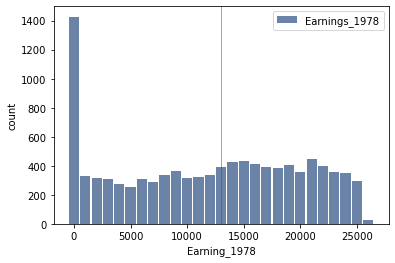

In [44]:
df_Earn78 = thinkstats2.Hist(round(df['Earnings_1978'],-3), label='Earnings_1978')

#Graph

thinkplot.Hist(df_Earn78)
thinkplot.Config(xlabel='Earning_1978', ylabel='count')
thinkplot.axvline(np.mean(df_Earn78), color="red")

c:\Users\Elsa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Elsa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Elsa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

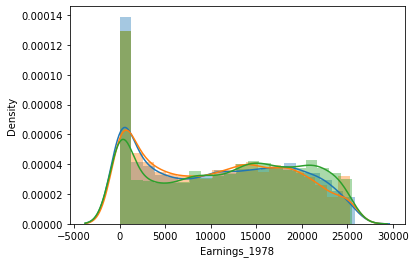

In [45]:
#Plot Earnings to see if it as a normal curve.
sns.distplot(df["Earnings_1974"], hist_kws={"label":"Earnings74"}, kde_kws={"label":"74"},)
sns.distplot(df["Earnings_1975"], hist_kws={"label":"Earnings75"}, kde_kws={"label":"75"},)
sns.distplot(df["Earnings_1978"], hist_kws={"label":"Earning78"}, kde_kws={"label":"78"},)
plt.show()

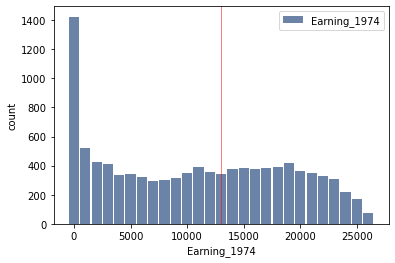

In [46]:
df_Earn74 = thinkstats2.Hist(round(df['Earnings_1974'],-3), label='Earning_1974')

#Graph

thinkplot.Hist(df_Earn74)
thinkplot.Config(xlabel='Earning_1974', ylabel='count')
thinkplot.axvline(np.mean(df_Earn74), color="red")

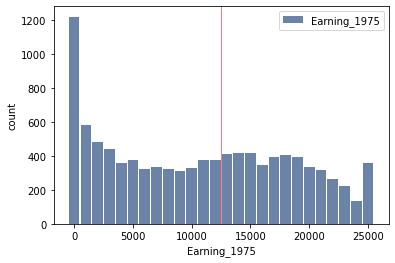

In [47]:
df_Earn75 = thinkstats2.Hist(round(df['Earnings_1975'],-3), label='Earning_1975')

#Graph

thinkplot.Hist(df_Earn75)
thinkplot.Config(xlabel='Earning_1975', ylabel='count')
thinkplot.axvline(np.mean(df_Earn75), color="red")

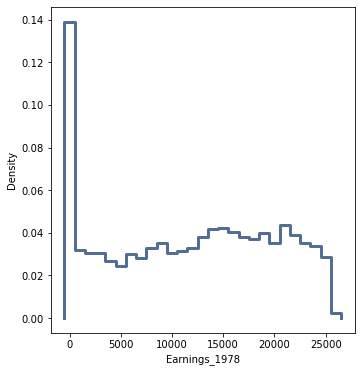

<Figure size 576x432 with 0 Axes>

In [48]:
#Graph
dfpmf_Earn78 = thinkstats2.Pmf(round(df["Earnings_1978"],-3))

thinkplot.PrePlot(cols=2)
thinkplot.Pmfs([dfpmf_Earn78])
#thinkplot.Show(xlabel="Earning_78", ylabel = "Percentage")
thinkplot.Show(xlabel="Earnings_1978", ylabel = "Density")

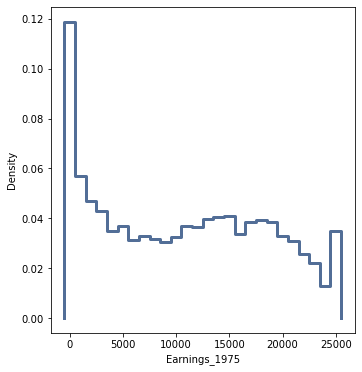

<Figure size 576x432 with 0 Axes>

In [49]:
#Graph
dfpmf_Earn75 = thinkstats2.Pmf(round(df["Earnings_1975"],-3))

thinkplot.PrePlot(cols=2)
thinkplot.Pmfs([dfpmf_Earn75])
#thinkplot.Show(xlabel="Earning_75", ylabel = "Percentage")
thinkplot.Show(xlabel="Earnings_1975", ylabel = "Density")

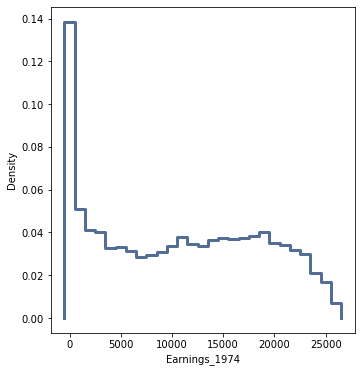

<Figure size 576x432 with 0 Axes>

In [50]:
#Graph
dfpmf_Earn74 = thinkstats2.Pmf(round(df["Earnings_1974"],-3))

thinkplot.PrePlot(cols=2)
thinkplot.Pmfs([dfpmf_Earn74])
#thinkplot.Show(xlabel="Earning_74", ylabel = "Percentage")
thinkplot.Show(xlabel="Earnings_1974", ylabel = "Density")

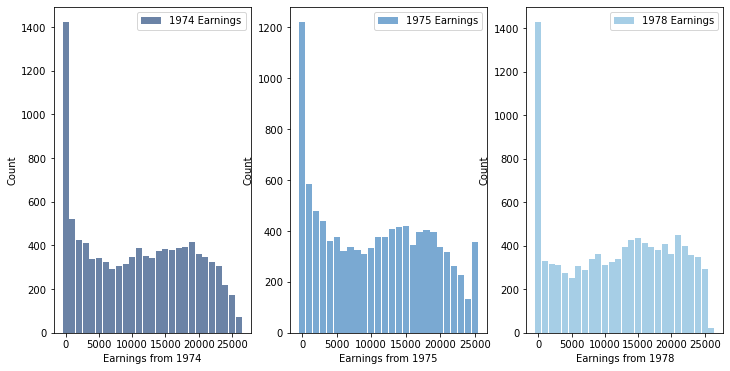

In [51]:
# 另一個同學版本的三年份薪水比較圖
# 操作上簡單一點，用 HIST 其實就夠了

earnings_1974 = df["Earnings_1974"]
earnings_1975 = df["Earnings_1975"]
earnings_1978 = df["Earnings_1978"]

earnings_1974_hist = thinkstats2.Hist(round(earnings_1974, -3), label='1974 Earnings')
earnings_1975_hist = thinkstats2.Hist(round(earnings_1975, -3), label='1975 Earnings')
earnings_1978_hist = thinkstats2.Hist(round(earnings_1978, -3), label='1978 Earnings')


thinkplot.PrePlot(3, rows =1, cols=3)
thinkplot.Hist(earnings_1974_hist)
thinkplot.Config(xlabel='Earnings from 1974', ylabel='Count')

thinkplot.SubPlot(2)
thinkplot.Hist(earnings_1975_hist)
thinkplot.Config(xlabel='Earnings from 1975', ylabel='Count')

thinkplot.SubPlot(3)
thinkplot.Hist(earnings_1978_hist)
thinkplot.Config(xlabel='Earnings from 1978', ylabel='Count')

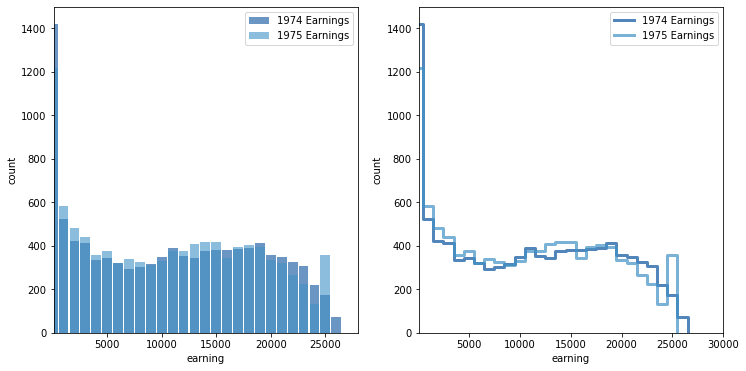

<Figure size 576x432 with 0 Axes>

In [52]:
thinkplot.PrePlot(2,cols=2)
thinkplot.Hist(earnings_1974_hist)
thinkplot.Hist(earnings_1975_hist)
thinkplot.Config(xlabel = 'earning', ylabel = 'count', axis = [100, 28000, 0, 1500])

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([earnings_1974_hist, earnings_1975_hist])
thinkplot.Show(xlabel = 'earning', ylabel = 'count', axis = [100, 30000, 0, 1500])

In [53]:
# Calcualting Effect Size of Nodeg
df_Nodeg.Earnings_1978.agg(['mean'])

,mean
Nodeg,
0,15796.747484
1,12585.205679


In [54]:
dfNodeg = df[df["Nodeg"]==1]
dfdeg = df[df["Nodeg"]==0]

In [55]:
# 計算兩組的 Cohen 效應大小。

def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [56]:
print("Nodeg effect size on mean :" , CohenEffectSize(dfdeg["Earnings_1978"], dfNodeg["Earnings_1978"]))

Nodeg effect size on mean : 0.2222556400531736


In [57]:
# Calcualting Effect Size of MaritalStatus
Married = df[df["MaritalStatus"]=="Married"]
NotMarried = df[df["MaritalStatus"]=="NotMarried"]

In [58]:
print("MaritalStatus on mean :" , CohenEffectSize(Married["Earnings_1978"], NotMarried["Earnings_1978"]))

MaritalStatus on mean : 0.4126176966416453


In [59]:
NotBlack = df[df["Race"]=="NotBlack"]
black = df[df["Race"]=="black"]

In [60]:
print("Race on mean :" , CohenEffectSize(NotBlack["Earnings_1978"], black["Earnings_1978"]))

Race on mean : 0.21771671259892947


In conclusion, Marital status has more effectsize on the mean than Nodeg

Average Earning using Mean and Median

Make and plot a graph or graph of your choosing of the 3 earnings values, in order to answer the below question. Identify how the graph gave you your answer.

In [61]:
print("Median Earning 1978 : %.2f" % np.median(df["Earnings_1978"]))
print("Median Earning 1975 : %.2f" %  np.median(df["Earnings_1975"]))
print("Median Earning 1974 : %.2f" %  np.median(df["Earnings_1974"]))

Median Earning 1978 : 12348.62
Median Earning 1975 : 10618.40
Median Earning 1974 : 10715.23


In [62]:
print("Mean Earning 1978 : %.2f" % np.mean(df["Earnings_1978"]))
print("Mean Earning 1975 : %.2f" %  np.mean(df["Earnings_1975"]))
print("Mean Earning 1974 : %.2f" %  np.mean(df["Earnings_1974"]))

Mean Earning 1978 : 11729.79
Mean Earning 1975 : 10626.42
Mean Earning 1974 : 10738.15


The median is better estimate for average income when the data has oultiers. While the mean is good when there are no outliers. in this case, the outliers have been removed and the average income using median and mean are very close. In the case of outliers in data, the mean will compute the averages for all the data while the median will chose the value in the center.

當數據有 oultiers 時，中位數是對平均收入的更好估計。 當沒有異常值時，均值很好。 在這種情況下，異常值已被移除，使用中位數和均值的平均收入非常接近。 在數據中存在異常值的情況下，平均值將計算所有數據的平均值，而中值將選擇中心值。

In [63]:
df_r = df.groupby('Races', as_index=False ).agg({"Earnings_1978":"median"})
print(df_r.rename(columns={"Earnings_1978": "AV_Income_1978"}))

                 Races  AV_Income_1978
0  NotBlackNotHispanic        12639.00
1                black         9527.64
2             hispanic        11770.09


In [64]:
df_r2 = df.groupby('Races', as_index=False ).agg({"Earnings_1975":"median"})
print(df_r2.rename(columns={"Earnings_1975": "Av_Income_1975"}))

                 Races  Av_Income_1975
0  NotBlackNotHispanic       10741.940
1                black        9110.055
2             hispanic       10938.870


In [65]:
df_r3 = df.groupby('Races', as_index=False ).agg({"Earnings_1974":"median"})
print(df_r3.rename(columns={"Earnings_1974": "Av_Income_1974"}))

                 Races  Av_Income_1974
0  NotBlackNotHispanic        10866.09
1                black         9708.17
2             hispanic        10646.66


In [66]:
dfrs = [df_r, df_r2, df_r3]
dfrs

[                 Races  Earnings_1978
 0  NotBlackNotHispanic       12639.00
 1                black        9527.64
 2             hispanic       11770.09,
                  Races  Earnings_1975
 0  NotBlackNotHispanic      10741.940
 1                black       9110.055
 2             hispanic      10938.870,
                  Races  Earnings_1974
 0  NotBlackNotHispanic       10866.09
 1                black        9708.17
 2             hispanic       10646.66]

In [67]:
from functools import reduce
final_df = reduce(lambda  left,right: pd.merge(left,right,on=['Races'],how='outer'), dfrs)

Race has a strong impact on earnings between 1974 and 1978. NotHispanic and NotBlack worker (predominantly white) had higher earnings than any other group. However, the gap between hispanic and black earning shrinked in 1978. Also, there was a general decline in earning between 1974 and 1975, except for hispanic population with a sharp rise between 1975 and 1978

In [68]:
# Ploting the chart. The chart would have been been better if it a time series of have more years
print(final_df)

                 Races  Earnings_1978  Earnings_1975  Earnings_1974
0  NotBlackNotHispanic       12639.00      10741.940       10866.09
1                black        9527.64       9110.055        9708.17
2             hispanic       11770.09      10938.870       10646.66


In [69]:
df_hisp = df[df["Races"]=='hispanic']
df_black = df[df['Races']=="black"]
df_nhb = df[df['Races']=="NotBlackNotHispanic"] 

In [70]:
# putting the years in data frame and median earning and rounding to 2 decimal places

Data = {'Year': [1974,1975,1978],
        'Earning': [round(df_black["Earnings_1974"].median(),2),round(df_black["Earnings_1975"].median(),2),round(df_black["Earnings_1978"].median(),2)]
  }

df_Earning_black = pd.DataFrame(Data,columns=['Year','Earning'])

In [71]:
# putting the years in data frame and median earning and rounding to 2 decimal places

Data1 = {'Year': [1974,1975,1978],
        'Earning': [round(df_hisp["Earnings_1974"].median(),2),round(df_hisp["Earnings_1975"].median(),2),round(df_hisp["Earnings_1978"].median(),2)]
  }

df_Earning_hisp = pd.DataFrame(Data1,columns=['Year','Earning'])

In [72]:
Data2 = {'Year': [1974,1975,1978],
        'Earning': [round(df_nhb["Earnings_1974"].median(),2),round(df_nhb["Earnings_1975"].median(),2),round(df_nhb["Earnings_1978"].median(),2)]
  }

df_Earning_nhb = pd.DataFrame(Data2,columns=['Year','Earning'])

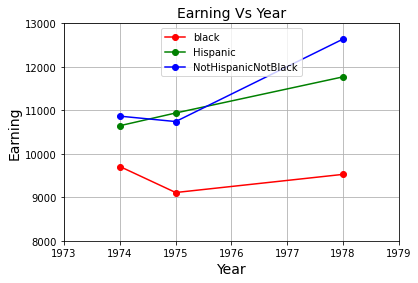

In [73]:
plt.plot(df_Earning_black['Year'], df_Earning_black['Earning'],label = "black", color='red', marker='o')
plt.plot(df_Earning_hisp['Year'], df_Earning_hisp['Earning'],label = "Hispanic", color='green', marker='o')
plt.plot(df_Earning_nhb['Year'], df_Earning_nhb['Earning'], label ="NotHispanicNotBlack", color='blue', marker='o')
plt.title('Earning Vs Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Earning', fontsize=14)
plt.axis([1973, 1979, 8000, 13000]) # setting axis scale X and Y
plt.legend(loc='upper center')
plt.grid(True)
plt.show()